In [1]:
import tarfile
import urllib.request
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
plt.set_cmap("gray") # Otherwise grayscale images look purple
%matplotlib inline

In [2]:
url = 'http://udon.stacken.kth.se/~ninjin/comp0090_assignment_1_data.tar.gz'
ftpstream = urllib.request.urlopen(url)
tar = tarfile.open(fileobj=ftpstream, mode="r|gz")
tar.extractall()
tar.close

<bound method TarFile.close of <tarfile.TarFile object at 0x0000027BEC288E48>>

In [3]:
trainxs = np.load("comp0090_assignment_1_data/fashion-train-imgs.npz").transpose((2, 1, 0))
trainys = np.load("comp0090_assignment_1_data/fashion-train-labels.npz")
devxs   = np.load("comp0090_assignment_1_data/fashion-dev-imgs.npz").transpose((2, 1, 0))
devys   = np.load("comp0090_assignment_1_data/fashion-dev-labels.npz")
testxs  = np.load("comp0090_assignment_1_data/fashion-test-imgs.npz").transpose((2, 1, 0))
testys  = np.load("comp0090_assignment_1_data/fashion-test-labels.npz")

In [4]:
print(trainxs.shape)
print(trainys.shape)
print(devxs.shape)
print(devys.shape)
print(testxs.shape)
print(testys.shape)

(12000, 28, 28)
(12000,)
(1000, 28, 28)
(1000,)
(1000, 28, 28)
(1000,)


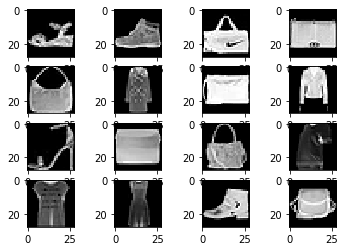

In [5]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(trainxs[np.random.randint(0, len(trainxs))])

In [6]:
# reshape data to make it easier to work with
trainxs = trainxs.reshape(-1, 784)
devxs = devxs.reshape(-1, 784)
testxs = testxs.reshape(-1, 784)

In [7]:
# function to create weight and sum parameters for the algorithm
def initialise_parameters(xs):
    w = np.zeros(xs.shape[1])
    b = 0
    return w, b

In [144]:
def logistic_func(x):
    return 1/(1 + np.exp(-x))

def logistic_der(x):
    return logistic_func(x) * (1 - logistic_func(x))

def f(x, w, b):
    return logistic_func(np.dot(w, x) + b)

def p(x, w, b):
    if f(x, w, b) >= 0.5:
        return 1
    return 0

In [145]:
#Measure Accuracy

def accuracy(xs, ys, w, b):
    correct = 0
    for i in range(xs.shape[0]):
        if p(xs[i], w, b) == ys[i]:
            correct += 1
    return correct/len(xs)*100    

In [146]:
#Loss Function

def loss_func(trainys, y_predict):
    sum = 0
    n = trainys.shape[0]
    for i in range(n):
        sum += (trainys[i] - y_predict[i]) ** 2
    return 1/2*n*sum

In [160]:
#Loss Function for single points

def loss(y, y_hat):
    return ((y - y_hat) ** 2) / 2

In [77]:
def logistic_regression(trainxs, trainys, devxs, devys):
    w, b = initialise_parameters(trainxs)
    
    accuracy_training = []
    accuracy_validation = []
    
    # store predicted y's and loss for each epoch
    y_predict = []
    loss_training = []
    
    # store old accuracy and consecutive epochs count to detect convergence
    acc_old = accuracy(trainxs, trainys, w, b)
    row_epoch = 0
    
    # store number of epochs to have a nice graph
    epoch = 0
    learning_rate = 0.1
    
    while True:
        print('Epoch', epoch)
        trainxs, trainys = shuffle(trainxs, trainys)
        grad_w, grad_b = initialise_parameters(trainxs)
        y_predict = []

        for i in range(trainxs.shape[0]):
            y_hat = f(trainxs[i], w, b)
            y_predict.append(y_hat)
            grad_w += trainxs[i] * (y_hat - trainys[i]) * (1 - y_hat) * y_hat 
            grad_b += (y_hat - trainys[i]) * (1 - y_hat) * y_hat 

        grad_w /= trainxs.shape[0]
        grad_b /= trainxs.shape[0]
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

        accuracy_train = accuracy(trainxs, trainys, w, b)
        accuracy_training.append(accuracy_train)
        print('Training set accuracy:', accuracy(trainxs, trainys, w, b))
        accuracy_dev = accuracy(devxs, devys, w, b)
        accuracy_validation.append(accuracy_dev)
        print('Validation set accuracy:', accuracy_dev)
        
        loss_train = loss_func(trainys, y_predict)
        loss_training.append(loss_train)
        print('Training set loss:', loss_train)
        
        # check if converged
        if np.abs(accuracy_dev - acc_old) < 0.0001:
            row_epoch += 1
            if row_epoch == 5:
                break
        else:
            row_epoch = 0
            
        acc_old = accuracy_dev
        epoch += 1
    
    return epoch, accuracy_training, accuracy_validation, loss_training

In [78]:
epoch, accuracy_training, accuracy_validation, loss_training = logistic_regression(trainxs, trainys, devxs, devys)

Epoch 0
Training set accuracy: 55.95833333333333
Validation set accuracy: 56.89999999999999
Training set loss: 18000000.0
Epoch 1
Training set accuracy: 66.4
Validation set accuracy: 68.4
Training set loss: 16931565.46894822
Epoch 2
Training set accuracy: 71.98333333333333
Validation set accuracy: 71.89999999999999
Training set loss: 16148409.759788837
Epoch 3
Training set accuracy: 76.40833333333333
Validation set accuracy: 76.2
Training set loss: 15455166.596845942
Epoch 4
Training set accuracy: 78.34166666666667
Validation set accuracy: 78.8
Training set loss: 14840650.932866825
Epoch 5
Training set accuracy: 79.48333333333333
Validation set accuracy: 80.2
Training set loss: 14296304.137748094
Epoch 6
Training set accuracy: 80.15
Validation set accuracy: 80.7
Training set loss: 13813186.268130224
Epoch 7
Training set accuracy: 80.48333333333333
Validation set accuracy: 81.10000000000001
Training set loss: 13382821.153176716
Epoch 8
Training set accuracy: 80.80833333333334
Validation

Training set accuracy: 92.70833333333334
Validation set accuracy: 93.89999999999999
Training set loss: 6677386.710129489
Epoch 72
Training set accuracy: 92.77499999999999
Validation set accuracy: 94.1
Training set loss: 6641381.0098430645
Epoch 73
Training set accuracy: 92.84166666666667
Validation set accuracy: 94.1
Training set loss: 6606019.420373009
Epoch 74
Training set accuracy: 92.89166666666667
Validation set accuracy: 94.19999999999999
Training set loss: 6571284.655352014
Epoch 75
Training set accuracy: 92.95
Validation set accuracy: 94.19999999999999
Training set loss: 6537160.045103857
Epoch 76
Training set accuracy: 93.025
Validation set accuracy: 94.19999999999999
Training set loss: 6503629.508002438
Epoch 77
Training set accuracy: 93.075
Validation set accuracy: 94.19999999999999
Training set loss: 6470677.52359763
Epoch 78
Training set accuracy: 93.09166666666667
Validation set accuracy: 94.19999999999999
Training set loss: 6438289.107362468
Epoch 79
Training set accurac

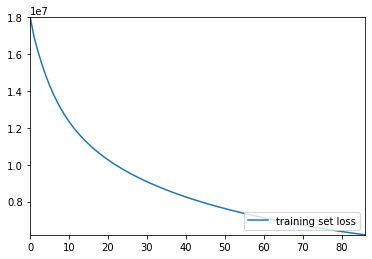

In [79]:
plt.axis([0, epoch, min(loss_training), max(loss_training) + 0.1])
plt.plot(loss_training, label='training set loss')
plt.legend(loc='lower right')

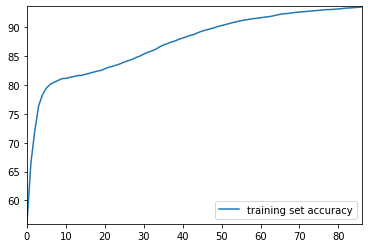

In [80]:
plt.axis([0, epoch, min(accuracy_training), max(accuracy_training) + 0.1])
plt.plot(accuracy_training, label='training set accuracy')
plt.legend(loc='lower right')

In [81]:
ind = accuracy_validation.index(max(accuracy_validation))
print("Best epoch =", ind)
print("Accuracy on training set =", accuracy_training[ind])
print("Accuracy on validation set =", accuracy_validation[ind])

Best epoch = 81
Accuracy on training set = 93.25833333333333
Accuracy on validation set = 94.5


In [82]:
def flatten(w, b):
    toflatten = (w, [b])
    vec = np.zeros(sum(len(x) for x in toflatten))
    offset = 0
    for parameter in toflatten:
        vec[offset:offset + len(parameter)] = parameter
        offset += len(parameter)
    return vec

In [83]:
def unflatten(w, b, vec):
    tounflatten = (w, [b])
    offset = 0
    for parameter in tounflatten:
        parameter[:] = vec[offset:offset + len(parameter)]
        offset += len(parameter)
    return tounflatten

In [153]:
def fdfprime(w, b, x, y):
    epsilon  = 0.000001
    grad_w = np.zeros_like(w)
    grad_b = 0.0
    vecm     = flatten(w, b)
    vecgradm = flatten(grad_w, grad_b)
    
    for i in range(len(vecm)):
        wi           = vecm[i]

        vecm[i]     += epsilon/2       
        w_j, b_j     = unflatten(grad_w, grad_b, vecm)
        r            = loss(y, f(x, w_j, b_j))
        vecm[i]      = wi
        vecm[i]     -= epsilon/2
        w_j, b_j     = unflatten(grad_w, grad_b, vecm)
        l            = loss(y, f(x, w_j, b_j))
        vecgradm[i]  = (r - l)/epsilon

        vecm[i]      = wi

    return unflatten(grad_w, grad_b, vecgradm)


In [162]:
def fprime(n, x, y, w, b):
    grad_w = np.zeros(n)
    grad_b = 0.0
    
    #Forward pass
    z = np.dot(w, x) + b
    y_hat = logistic_func(z)
    
    #Backward pass
    grad_z = (y_hat - y) * logistic_der(z)
    grad_w += x * (y_hat - y) * (1 - y_hat) * y_hat 
    grad_b += (y_hat - y) * (1 - y_hat) * y_hat
    
    return (grad_w, [grad_b])

In [165]:
x = trainxs[0]
y = trainys[0]
w = np.random.random(784) / 100
grad_w, grad_b = fprime(trainxs.shape[1], x, y, w, 0.0)
fd_grad_w, fd_grad_b = fdfprime(w, 0.0, x, y)

In [166]:
fd_b = np.subtract(fd_grad_b,grad_b)
fd_w = np.subtract(fd_grad_w,grad_w)
max_fd = fd_w.max()
print(fd_b)
print(fd_w)
print("Max difference for w:", max_fd)

[1.70061187e-12]
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.47589588e-11 -1.02649139e-11
  1.06133990e-11 -4.46512272e-11 -2.36907577e-11 -3.72809561e-11
  1.83123655e-11  3.19025639e-11  3.96836869e-11  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.74903642e-11 -1.74708442e-11 -7.95305904e-11
 -3.10610287e-11 -4.51442494e-11  3.82046617e-11 -7.95305904e-11
 -3.09788722e-11 -3.08967019e-11 -2.38550985e-11  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.0000